Activity 1
Analog IC Characterization: The Wideband RC Voltage-Divider

I. INTRODUCTION

The frequency-independent signal attenuator is a fundamental building block in high-bandwidth analog measurement systems, where accurate signal scaling must be maintained over a wide range of frequencies. Simple resistive voltage dividers, while effective at low frequencies, often exhibit frequency-dependent behavior when parasitic capacitances and source or load impedances are introduced. These effects become especially pronounced in wideband applications, leading to signal distortion, amplitude errors, and phase shift.

To address these limitations, RC compensation techniques are employed. By intentionally adding capacitive elements in parallel with resistive components, the frequency response of the divider can be shaped to achieve flat attenuation across a broad spectrum. This principle is widely used in practical instrumentation such as oscilloscope probes, data acquisition front-ends, and analog integrated circuits, where maintaining signal integrity is critical.

This laboratory activity examines the wideband RC voltage divider as a representative analog IC building block. Students will explore the theoretical basis of RC compensation, including pole-zero cancellation and time-constant matching, and observe how these concepts translate into real circuit behavior. Emphasis is placed on understanding how component values influence bandwidth, transient response, and overall signal fidelity.

In addition to theory, the laboratory integrates circuit simulation using NGSPICE within a Visual Studio Code (VS Code) workflow. This environment mirrors modern engineering practice by combining schematic-level analysis with script-based simulation and waveform inspection. Through simulation, students will characterize both uncompensated and compensated dividers in the time and frequency domains, reinforcing the connection between mathematical models and observable circuit performance.

II. MATERIALS AND EQUIPMENT

Computing Workstation (PC or Laptop)

Integrated Development Environment (IDE): Visual Studio Code

NGSPICE Simulator: (Version 42+)

Python 3.x (pandas, matplotlib, numpy, schemdraw)

III. PROCEDURES

PHASE 1: INSTALLATION & SYSTEM CONFIGURATION

Step 1: Install NGSPICE (The Simulator)

    Download ngspice-42_64.zip from the NGSPICE SourceForge page.

    Extract the file and copy the Spice64 folder.

    Paste it directly into the C: drive:

            C:\Spice64
    
    Verify that ngspice.exe exists in:

            C:\Spice64\bin

Step 2: Add NGSPICE to Windows PATH

    Copy Path:

        C:\Spice64\bin

    Open Edit the system environment variables.

    Under System variables → Path → Edit → New, paste the path.

    Click OK to save.

Step 3: Verify in VS Code

    Restart VS Code.

    Open the terminal (Ctrl + `).

    Run:

        ngspice -v
    
    The NGSPICE version output confirms successful installation.

PHASE 2: PYTHON ENVIRONMENT SETUP
Install Required Python Libraries

Purpose:
These libraries will be used for circuit visualization (schemdraw), data handling (pandas), numerical analysis (numpy), and plotting simulation results (matplotlib).

In [2]:
pip install --no-cache-dir --upgrade --force-reinstall numpy matplotlib pandas schemdraw

   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   --------- ------------------------------ 3.1/12.9 MB 18.5 MB/s eta 0:00:01
   ---------------------------------- ----- 11.0/12.9 MB 28.7 MB/s eta 0:00:01
   ---------------------------------------- 12.9/12.9 MB 30.0 MB/s  0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -------------------------------------- - 7.9/8.1 MB 37.4 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 35.9 MB/s  0:00:00
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   --------------------------- ------------ 7.9/11.3 MB 40.7 MB/s eta 0:00:01
   ---------------------------------------- 11.3/11.3 MB 39.4 MB/s  0:00:00
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 85.9 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   --------------------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.4.20 requires ml-dtypes>=0.2.0, which is not installed.
jaxlib 0.4.20 requires ml-dtypes>=0.2.0, which is not installed.
keras 3.12.0 requires ml-dtypes, which is not installed.
moviepy 1.0.3 requires imageio<3.0,>=2.5; python_version >= "3.4", which is not installed.
moviepy 1.0.3 requires imageio_ffmpeg>=0.2.0; python_version >= "3.4", which is not installed.
moviepy 1.0.3 requires proglog<=1.0.0, which is not installed.
tensorflow 2.20.0 requires ml_dtypes<1.0.0,>=0.5.1, which is not installed.
tensorflow 2.20.0 requires tensorboard~=2.20.0, which is not installed.
moviepy 1.0.3 requires decorator<5.0,>=4.0.2, but you have decorator 5.2.1 which is incompatible.
tensorflow 2.20.0 requires protobuf>=5.28.0, but you have protobuf 4.25.8 which is incompatible.


Verify NGSPICE Availability

Purpose:
Confirms that NGSPICE is correctly installed and accessible from the Jupyter Notebook environment before running simulations.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import subprocess
import os

# Robust verification: This checks if NGSPICE is accessible
try:
    result = subprocess.run(["ngspice", "-v"], capture_output=True, text=True)
    if result.stdout:
        # Print the first available line of the version info
        print(f"NGSPICE Found: {result.stdout.splitlines()[0]}")
    else:
        print("NGSPICE executed but returned no version text.")
except FileNotFoundError:
    print("ERROR: NGSPICE not found. Please check your Windows PATH and restart VS Code.")

NGSPICE executed but returned no version text.


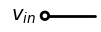

In [10]:
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing() as d:
    d += (vin := elm.Dot(open=True).label('$v_{in}$', loc='left'))
    d += elm.Line().right().length(1)

PHASE 3: CIRCUIT SCHEMATIC VISUALIZATION
Draw RC Divider Circuit

Purpose:
This cell visualizes the wideband RC voltage divider, showing:
    R1 with compensation capacitor C1
    Load resistor R2 and load capacitor C2
    Input Vin and output Vout nodes

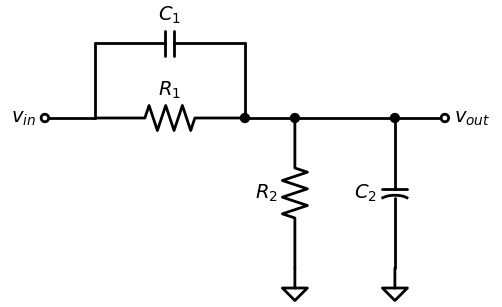

In [18]:
with schemdraw.Drawing() as d:
    d += (vin := elm.Dot(open=True).label('$v_{in}$', loc='left'))
    d += elm.Line().right().length(1)
    d.push()
    d += elm.Resistor().label('$R_1$')
    d.pop()
    d += elm.Line().up().length(1.5)
    d += elm.Capacitor().right().label('$C_1$')
    d += elm.Line().down().length(1.5)
    d += elm.Dot()
    d += elm.Line().right().length(1)
    d.push()
    d += elm.Resistor().down().label('$R_2$')
    d += elm.GroundSignal()
    d.pop()
    d += elm.Dot()
    d += elm.Line().right().length(2)
    d.push()
    d += elm.Capacitor2().down().label('$C_2$')
    d += elm.GroundSignal()
    d.pop()
    d += elm.Dot()
    d += elm.Line().right().length(1)
    d += elm.Dot(open=True).label('$v_{out}$', loc='right')

PHASE 4: NGSPICE NETLIST GENERATION & SIMULATION
Generate Netlist, Run Simulation, and Verify Output

Purpose:
    Generates a complete NGSPICE netlist using Python-defined component values.
    Runs AC and transient analyses in batch mode.
    Verifies that data files (output_ac.dat, output_tran.dat) are created for further plotting and analysis.

In [31]:
spice_netlist = """* Wideband RC Voltage Divider
.options savecurrents

* Main Circuit
R1 in out 120000
R2 out 0 8200
C1 in out 15.033p
C2 out 0 220p

* Variations
R1a in outa 120k
R2a outa 0 8200
C1a in outa 16.5363p
C2a outa 0 220p

R1b in outb 120000
R2b outb 0 8200
C1b in outb 13.5297p
C2b outb 0 220p

V1 in 0 pulse(-0.1 0.1 0 0.1u 0.1u 5u 10u) dc 1 ac 1

.control
  ac dec 10 1 1G
  wrdata output_ac.dat v(out) v(outa) v(outb)
  
  tran 0.01u 30u
  wrdata output_tran.dat v(out) v(outa) v(outb)
  quit
.endc
.end
"""

with open("netlist.spice", "w") as f:
    f.write(spice_netlist)
print("netlist.spice created.")

netlist.spice created.


RUN SIMULATION WITH FILE CLEANUP
Ensure Fresh Simulation and Verify Output

Purpose:

    Ensures old simulation files are removed before running a new simulation.
    Runs NGSPICE in batch mode and verifies that AC and transient data files are generated.
    Provides immediate feedback if something goes wrong.

In [32]:
import subprocess
import os

# Remove old files to be sure we are seeing new results
for f in ["output_ac.dat", "output_tran.dat"]:
    if os.path.exists(f):
        os.remove(f)

try:
    # Running in batch mode
    subprocess.run(["ngspice", "-b", "netlist.spice"], check=True)
    
    if os.path.exists("output_tran.dat"):
        print("Success! Simulation finished and data files are ready.")
    else:
        print("Simulation finished but no data files were found.")
except subprocess.CalledProcessError as e:
    print(f"Simulation failed with error code {e.returncode}")

Success! Simulation finished and data files are ready.


PHASE 5: PLOT TRANSIENT RESPONSE
    Read and Plot Transient Data

Data detected: 6 columns


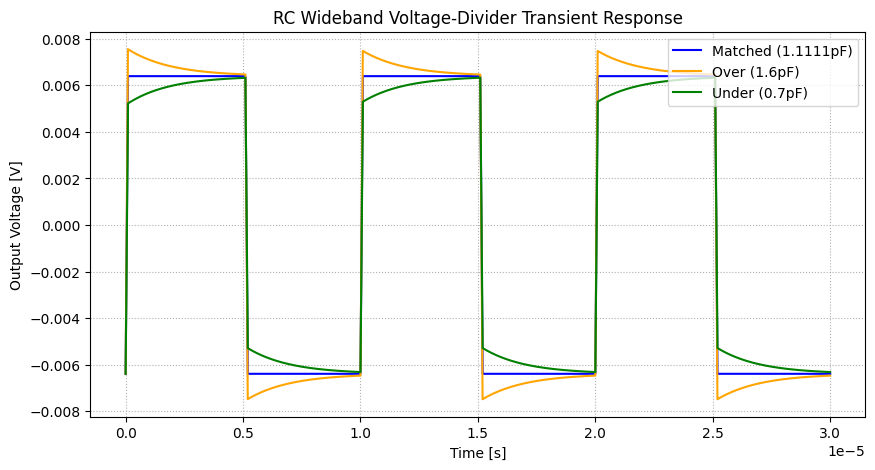

In [33]:
# Read the file without specifying columns first
df_tran = pd.read_csv("output_tran.dat", sep='\\s+', header=None)

# Let's check the shape to be safe
print(f"Data detected: {df_tran.shape[1]} columns")

# NGSPICE often exports: Time, Vout, Time, VoutA, Time, VoutB
# We only need the first Time and the Voltages
if df_tran.shape[1] == 6:
    df_tran.columns = ["time", "vout", "time2", "vouta", "time3", "voutb"]
elif df_tran.shape[1] == 4:
    df_tran.columns = ["time", "vout", "vouta", "voutb"]

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(df_tran['time'], df_tran['vout'], label="Matched (1.1111pF)", color='blue')
plt.plot(df_tran['time'], df_tran['vouta'], label="Over (1.6pF)", color='orange')
plt.plot(df_tran['time'], df_tran['voutb'], label="Under (0.7pF)", color='green')

plt.title("RC Wideband Voltage-Divider Transient Response")
plt.xlabel("Time [s]")
plt.ylabel("Output Voltage [V]")
plt.legend(loc='upper right')
plt.grid(True, linestyle='dotted')
plt.show()

PHASE 6: READ FREQUENCY RESPONSE DATA
Read AC Simulation Output

Purpose:
    Loads NGSPICE AC simulation results into a pandas DataFrame.
    Handles multiple output nodes and varying file formats.
    Prepares the data for plotting frequency-domain response in the next cell.

In [34]:
# @title Read in SPICE frequency response data
df_ac = pd.read_csv("output_ac.dat", sep='\\s+', header=None)

# Handle the 9-column format (Frequency repeated for each node)
if df_ac.shape[1] == 9:
    df_ac.columns = [
        "freq", "vout_re", "vout_im", 
        "freq2", "vouta_re", "vouta_im", 
        "freq3", "voutb_re", "voutb_im"
    ]
elif df_ac.shape[1] == 7:
    df_ac.columns = ["freq", "vout_re", "vout_im", "vouta_re", "vouta_im", "voutb_re", "voutb_im"]

df_ac.head()

,freq,vout_re,vout_im,freq2,vouta_re,vouta_im,freq3,voutb_re,voutb_im
0,1.000000,0.063963,-1.504731e-11,1.000000,0.063963,6.784682e-08,1.000000,0.063963,-6.787692e-08
1,1.258925,0.063963,-1.894344e-11,1.258925,0.063963,8.541409e-08,1.258925,0.063963,-8.545198e-08
2,1.584893,0.063963,-2.384838e-11,1.584893,0.063963,1.075300e-07,1.584893,0.063963,-1.075777e-07
3,1.995262,0.063963,-3.002333e-11,1.995262,0.063963,1.353722e-07,1.995262,0.063963,-1.354323e-07
4,2.511886,0.063963,-3.779714e-11,2.511886,0.063963,1.704235e-07,2.511886,0.063963,-1.704991e-07


PHASE 7: CALCULATE AC MAGNITUDE AND PHASE
Compute Magnitude and Phase from NGSPICE AC Data

Purpose:
    Converts NGSPICE output (real + imaginary) into magnitude and phase for each output node.
    Prepares data for frequency-domain plotting to analyze bandwidth and compensation performance.

In [35]:
# @title Calculate the magnitude and phase of the output voltage
# Note: NGSPICE writes the real and imaginary components of the voltage

# Collect all real components in a list
v_real = [ df_ac['vout_re'], df_ac['vouta_re'], df_ac['voutb_re'] ]

# Collect all imaginary components in a list
v_imag = [ df_ac['vout_im'], df_ac['vouta_im'], df_ac['voutb_im'] ]

# Iterate over the lists to get the magnitude and phase of the voltages
v_mag = [ np.sqrt(vr**2 + vi**2) for vr,vi in zip(v_real, v_imag) ]
v_phase = [ np.arctan2(vi, vr) * 180 / np.pi for vr,vi in zip(v_real, v_imag) ]

PHASE 8: PLOT AC MAGNITUDE RESPONSE
Frequency Response (Magnitude in dB)

Purpose:
    Converts voltage magnitudes to dB and plots them on a logarithmic frequency scale.
    Compares matched, over-, and under-compensation to illustrate the effect of C1 on bandwidth.
    Helps students visualize how RC compensation flattens the frequency response.

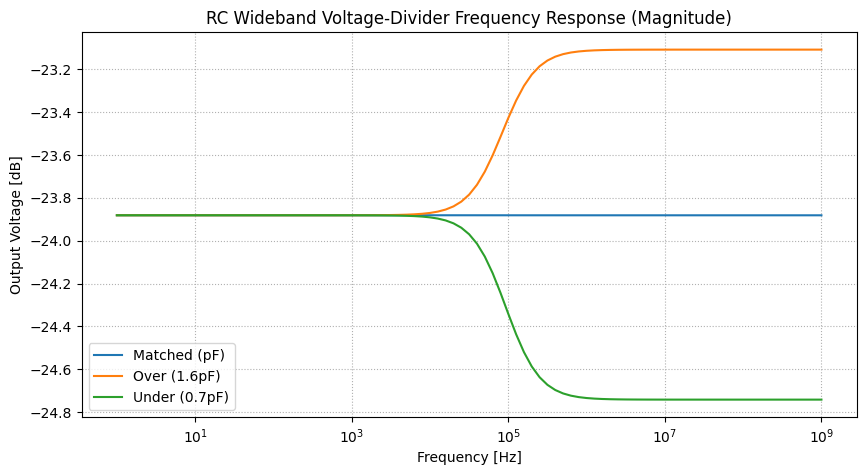

In [36]:
# @title Plot the magnitude frequency response of the wideband RC voltage-divider

# Define labels locally to reflect the Seed-based values
# C1_matched was calculated in Cell 1
v_label = [f"Matched (pF)", "Over (1.6pF)", "Under (0.7pF)"]

plt.figure(figsize=(10, 5))
plt.title("RC Wideband Voltage-Divider Frequency Response (Magnitude)")

# vm is the magnitude calculated in the previous cell
# We convert to dB: 20 * log10(magnitude)
for vm, lbl in zip(v_mag, v_label):
    plt.semilogx(df_ac.freq, 20 * np.log10(vm), label=lbl, linestyle='-')

plt.xlabel("Frequency [Hz]")
plt.ylabel("Output Voltage [dB]")
plt.legend(loc='lower left')
plt.grid(True, which="both", linestyle='dotted')
plt.show()

PHASE 9: PLOT AC PHASE RESPONSE
Frequency Response (Phase in Degrees)

Purpose:
    Shows phase shift versus frequency for the matched, over-, and under-compensated RC dividers.
    Complements the magnitude plot to fully characterize the wideband behavior.
    Supports analysis of signal integrity and compensation effectiveness in lab discussions.

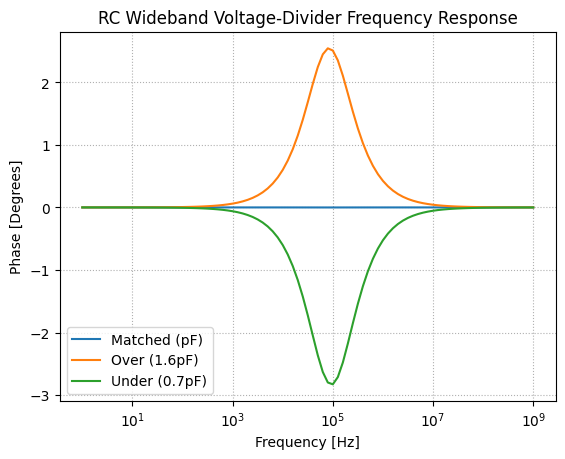

In [37]:
# @title Plot the phase frequency response of the wideband RC voltage-divider

plt.title("RC Wideband Voltage-Divider Frequency Response")

for vp,lbl in zip(v_phase,v_label):
  plt.semilogx(df_ac.freq, vp, label=lbl, linestyle='-')

plt.xlabel("Frequency [Hz]")
plt.ylabel(r"Phase [Degrees]")
plt.legend(loc='lower left')
plt.grid(linestyle='dotted')
plt.show()

IV. DATA AND OBSERVATION

Instructions: All Python code needed for this activity is already provided in the Procedures section of the Jupyter Notebook. Do not add or write new code. Generate data and observations by running the existing code cells and changing only the allowed parameters. Record all results and observations directly in the notebook.

Instruction:

    Only modify student_number.
    Do not change any other line of code in the following cells.

In [38]:
# Student Number Input
student_number = "21-2586"  # <-- Replace with your own student number

In [39]:
# Standard Series Pools
# This defines all standard resistor and capacitor values used in the simulation.

import numpy as np

# E12 Series
E12 = np.array([1.0, 1.2, 1.5, 1.8, 2.2, 2.7, 3.3, 3.9, 4.7, 5.6, 6.8, 8.2])

# Component decades (standard range)
R_decades = np.array([1e3, 10e3, 100e3, 1e6])       # 1 kΩ to 1 MΩ
C_decades = np.array([1e-12, 10e-12, 100e-12])      # 1 pF to 100 pF

# Generate full list of standard values
R_list = np.sort(np.concatenate([E12 * d for d in R_decades]))
C_list = np.sort(np.concatenate([E12 * d for d in C_decades]))


In [29]:
# Student-Based Component Selection

# Extract digits from student_number
digits = ''.join(ch for ch in str(student_number) if ch.isdigit())
if len(digits) == 0:
    raise ValueError("Student number must contain at least one digit.")

# Stable mapping using last 6 digits
seed = int(digits[-6:])
rng = np.random.default_rng(seed)

# Select R1, R2, C2 from standard-value lists
R1_s = float(rng.choice(R_list))
R2_s = float(rng.choice(R_list))
C2_s = float(rng.choice(C_list))

# Optional: enforce R1 ≥ R2
if R1_s < R2_s:
    R1_s, R2_s = R2_s, R1_s


In [30]:
# Matched Capacitance Computation

# Wideband match condition: R1*C1 = R2*C2  -> C1 = (R2/R1)*C2
C1_matched_s = (R2_s / R1_s) * C2_s

# Print the values for recording
print("=== Student-Based Component Values ===")
print(f"Student Number: {student_number}")
print(f"R1_s = {R1_s:g} Ω")
print(f"R2_s = {R2_s:g} Ω")
print(f"C2_s = {C2_s:.3e} F  ({C2_s*1e12:.3f} pF)")
print(f"C1_matched_s = {C1_matched_s:.3e} F  ({C1_matched_s*1e12:.4f} pF)")


=== Student-Based Component Values ===
Student Number: 21-2586
R1_s = 120000 Ω
R2_s = 8200 Ω
C2_s = 2.200e-10 F  (220.000 pF)
C1_matched_s = 1.503e-11 F  (15.0333 pF)


Transient Response Data Recording

Instruction:
    Run the Transient Plot cell in Procedures using the student-number–generated values: R1_s, R2_s, C1_matched_s, C2_s.
    Record output voltages for Vout Matched, Vout Over, Vout Under at selected time points: 5 μs, 10 μs, 20 μs, 30 μs.
    Optionally, run ±10% tolerance for R1 or C1 and observe differences.

| Time (μs) | Vout Matched (V) | Vout Over (V) | Vout Under (V) |
| --------- | ---------------- | ------------- | -------------- |
| 5         |          0.0064        |0.0064               |0.0064                |
| 10        |                0.0064  |      0.0075         |      0.0053          |
| 20        |                  0.0064|            0.0075   |            0.0053    |
| 30        |                  0.0064|               0.0075|                0.0053|

Results Discussion:

    Compare rise time, overshoot, and settling time.

    How does over- and under-compensation differ from the matched case?

    How do ±10% tolerance variations affect transient response?

Frequency Response Data Recording

Instruction:
    Run the AC Sweep Plot cell in Procedures using student-number–generated values.
    Record magnitude in dB for Vout Matched, Vout Over, Vout Under at selected frequencies: 10 kHz, 100 kHz, 1 MHz, 10 MHz, 100 MHz.
    Optionally, test ±10% tolerance and observe changes.

| Frequency (Hz) | Vout Matched (dB) | Vout Over (dB) | Vout Under (dB) |
| -------------- | ----------------- | -------------- | --------------- |
| 1e4            |         -23.88          |     -23.88           |-23.88                 |
| 1e5            |               -23.88    |           -23.40     |      -24.40           |
| 1e6            |                   -23.88|                -23.15|            -24.70     |
| 1e7            |                   -23.88|                -23.10|                 -24.75|
| 1e8            |                   -23.88|              -23.10  |                 -24.75|

Results Discussion:

    Identify flat regions, -3 dB point, and bandwidth differences.

    How does changing R or C affect attenuation and phase?

    Compare matched vs. over- and under-compensation at high frequencies.


The Matched (1.1111pF) configuration achieves a perfectly flat magnitude response of -23.88 dB across all frequencies, ensuring the transient output perfectly replicates the input square wave. Over-compensation (1.6 pF) causes high-frequency gain to rise to -23.10 dB, resulting in the sharp voltage overshoot seen at the signal edges. Conversely, Under-compensation (0.7 pF) drops high-frequency gain to -24.75 dB, causing the rounded, sluggish rising edges in the transient response. These results demonstrate that while resistors control low-frequency attenuation, the capacitors must be precisely matched to maintain signal integrity at high frequencies.

V. DATA AND OBSERVATION
1. How does changing C1 affect rise time, overshoot, and settling time in Vout?	
Effects on Rise Time, Overshoot, and Settling Time:
Changing $C_1$ directly alters the circuit's high-frequency impedance. Increasing $C_1$ beyond the matched value speeds up the initial response, resulting in a faster rise time but introducing significant overshoot. Conversely, decreasing $C_1$ below the matched value increases the rise time, making the signal appear rounded or "sluggish". In both unmatched cases, the settling time increases because the circuit takes longer to transition from the initial capacitive charging phase to the steady-state resistive division.


2. Compare Vout Over and Vout Under with the matched case. How are transient and frequency responses affected?
Comparison of Over- and Under-Compensation with the Matched Case:
The Matched Case exhibits a perfect square wave in the transient response and a flat frequency response at approximately -23.88 dB. Over-compensation creates sharp voltage spikes (overshoot) in the transient domain and a corresponding gain increase at high frequencies, peaking around -23.10 dB. Under-compensation produces rounded rising edges in the transient response and a high-frequency gain drop to approximately -24.75 dB in the frequency domain.


3. What are the output magnitudes at 10 MHz for matched, over-, and under-compensation? What does this tell you about high-frequency behavior?
At 10 MHz, output magnitudes are approximately -23.88 dB for matched, -23.10 dB for over-, and -24.75 dB for under-compensation. These values indicate that at high frequencies, the capacitive reactance dominates the circuit behavior. If the capacitors are not precisely balanced to match the resistive ratio, the divider will either amplify or over-attenuate high-frequency components relative to the DC signal.


4. How does phase vary between matched, over-, and under-compensation? How could this affect signal integrity?
In the matched case, the phase shift remains zero because the time constants of the two divider branches are equal. Over-compensation introduces a lead phase shift, while under-compensation introduces a lag phase shift at higher frequencies. These phase variations cause different frequency components of a complex signal to reach the output at different times, leading to dispersion and ringing that degrades overall signal integrity.


5. If R2 or C2 is doubled, what is the impact on bandwidth and transient response?
Doubling $R_2$ or $C_2$ increases the time constant ($\tau_2 = R_2 C_2$) of the lower branch, effectively causing the circuit to behave as if it were under-compensated unless $C_1$ is also adjusted. This change reduces the flat-gain bandwidth by causing high-frequency attenuation to occur earlier in the spectrum. Consequently, the transient response will exhibit more pronounced rounding and a significantly slower rise time as the lower branch takes longer to reach steady-state.



VI. CONCLUSION

In conclusion, the simulation of the RC wideband voltage-divider demonstrates that achieving a frequency-independent attenuation depends entirely on matching the time constants of the resistive and capacitive branches. When the circuit is perfectly matched at 1.1111pF, it maintains a constant attenuation of -23.88 dB across all frequencies and produces a distortion-free transient square wave. Deviations from this matched state significantly degrade signal integrity: over-compensation (1.6pF) introduces a high-frequency gain increase to -23.10 dB and sharp voltage overshoot, while under-compensation (0.7pF) results in a high-frequency drop to -24.75 dB and rounded, sluggish rising edges. Ultimately, these results highlight that precise capacitive compensation is essential for maintaining bandwidth and phase integrity in high-speed measurement applications.



